# Теория
### Вопрос:
Визуализация данных с помощью диаграммы рассеяния. Привести пример.

Диаграмма рессеяния отображает значения двух переменных в виде точек на декартовой плоскости. На диаграмме рассеяния каждому наблюдению (вроде ещё можно назвать элементарной единицой набора данных) соответствует точка, координаты которой равны значениям двух каких-то параметров этого наблюдения. Если предполагается, что один из параметров зависит от другого, то обычно значения независимого параметра откладывается по горизонтальной оси, а значения зависимого — по вертикальной. Диаграммы рассеяния используются для демонстрации наличия или отсутствия корреляции между двумя переменными.

Для оценки возможных корреляций можно визуально аппроксимировать точки какой-нибудь монотонной функцией, и в случае хорошей визуальной аппроксимации, дать оценку характера свзяи (положительный или отрицательный)

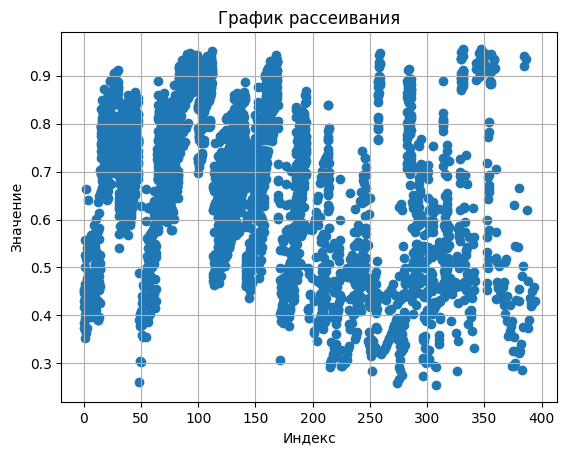

In [2]:
# Для примера возьму свой датасет из лр3 а также функции отображения из лр1

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("./gapminder_data_graphs.csv")
df = df.dropna()

def plot_scatter_with_categories(df, x_column, y_column, title, x_label, y_label):
    categories = df[x_column].unique()
    category_mapping = {category: i for i, category in enumerate(categories)}
    numeric_x = df[x_column].map(category_mapping)

    plt.scatter(numeric_x, df[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.grid(True)
    plt.show()

plot_scatter_with_categories(df, 'life_exp', 'hdi_index', 'График рассеивания', 'Индекс', 'Значение')

# Практика
Задача 1
1.	Взят ряд простых чисел от 3 до 17.\
А) Сколько  дробей можно составить из этого набора чисел так,
чтобы в каждую дробь входили 2 различных числа? (Все дроби д.б. различные)\
Б) Сколько среди них будет правильных дробей?

In [4]:
# Беру простые числа 3, 5, 7, 11, 13, 17
# Считаю C^2_7 * 2 (так как дроби могут быть перевёрнуты)
print('Ответ на a: ', 21 * 2)

#Для буквы б я решил перебором)
print('Ответ на б: ', 6 + 5 + 4 + 3 + 2)

Ответ на a:  42
Ответ на б:  20


Задача 2
2.	Дан  датасет – 100 значений:\
Случайные значения в интервале [от –N по списку до  N по списку+1] (для №1 – интервал [-1;2])\
Найти различные значения из описательной статистики (три и более: среднее, … , …) и построить диаграмму размаха («ящик с усами»).


Среднее значение: 0.5163447730155124
Стандартное отклонение: 0.8498184734151704
Медиана: 0.5224269532945063
Первый квартиль (25-й процентиль): -0.2240586275293742
Третий квартиль (75-й процентиль): 1.2200411977246528


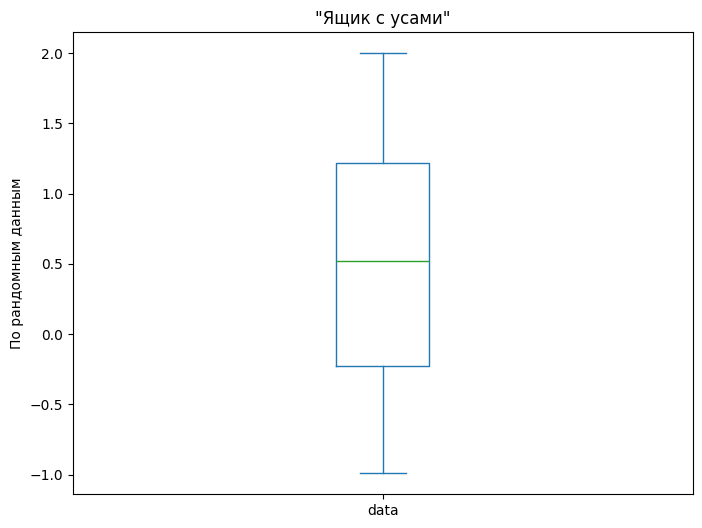

In [7]:
# Для поиска характеристик использовал стандартную библиотеку numpy, а для ящика функции из 1 лабы

import numpy as np
import scipy.stats as stats
import pandas as pd

N = 1
size = 1000

random_values = np.random.uniform(low=-N, high=N + 1, size=size)

df = pd.DataFrame({'data': random_values})

mean = np.mean(random_values)
std_dev = np.std(random_values)
median = np.median(random_values)
quartile_25 = np.percentile(random_values, 25)
quartile_75 = np.percentile(random_values, 75)

print(f"Среднее значение: {mean}")
print(f"Стандартное отклонение: {std_dev}")
print(f"Медиана: {median}")
print(f"Первый квартиль (25-й процентиль): {quartile_25}")
print(f"Третий квартиль (75-й процентиль): {quartile_75}")

def plot_box(df, name):
    df[name].plot(kind='box', figsize=(8, 6))
    plt.title(f'"Ящик с усами"')
    plt.ylabel('По рандомным данным')
    plt.show()

plot_box(df, "data")